In [1]:
import numpy as np 
import pandas as pd


import matplotlib.pyplot as plt
%matplotlib inline

In [2]:

from tensorflow.keras.datasets import mnist

2023-04-03 23:12:42.155437: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-04-03 23:12:42.183115: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-03 23:12:42.634165: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
single_img = x_train[0]

In [6]:
single_img.shape

(28, 28)

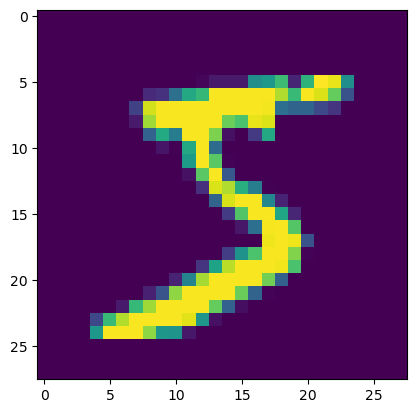

In [7]:
plt.imshow(single_img)

In [8]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [9]:
from tensorflow.keras.utils import to_categorical

In [10]:
y_train.shape

(60000,)

In [11]:
y_example = to_categorical(y_train)

In [12]:
y_example.shape

(60000, 10)

In [13]:
y_example[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [14]:
y_cat_test = to_categorical(y_test, num_classes=10)
y_cat_train = to_categorical(y_train, num_classes=10)

In [15]:
single_img.max()

255

In [16]:
single_img.min()

0

In [17]:
# Future images should always have values between 0-255
# No need to use MinMaxScaler, can fit to an extent to training data, because test data is also an image
x_train = x_train/255
x_test = x_test/255

In [18]:
scaled_img = x_train[0]

In [19]:
scaled_img.max()

1.0

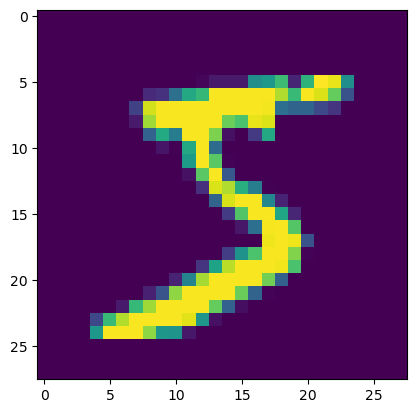

In [20]:
plt.imshow(scaled_img)

In [21]:
x_train.shape

(60000, 28, 28)

In [22]:
x_train = x_train.reshape(60000, 28, 28, 1)

In [23]:
x_test = x_test.reshape(10000, 28, 28, 1)

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
import tensorflow.keras

In [25]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(4, 4), strides=(1, 1), input_shape=(28, 28, 1), activation="relu"))
model.add(MaxPool2D(2, 2))

model.add(Flatten())

model.add(Dense(128, activation="relu"))


model.add(Dense(10, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

2023-04-03 23:12:45.182092: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-04-03 23:12:45.199277: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [26]:
from tensorflow.keras.callbacks import EarlyStopping

In [27]:
earlyStop = EarlyStopping(monitor="val_loss", patience=1, verbose=1)

In [28]:
model.fit(x_train, y_cat_train, epochs=10, validation_data=(x_test, y_cat_test), callbacks=[earlyStop])

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1345 - accuracy: 0.9597 - val_loss: 0.0512 - val_accuracy: 0.9847
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0461 - accuracy: 0.9856 - val_loss: 0.0385 - val_accuracy: 0.9870
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0277 - accuracy: 0.9916 - val_loss: 0.0375 - val_accuracy: 0.9860
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0196 - accuracy: 0.9940 - val_loss: 0.0334 - val_accuracy: 0.9886
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0134 - accuracy: 0.9959 - val_loss: 0.0372 - val_accuracy: 0.9883
Epoch 5: early stopping


In [29]:
metrics = pd.DataFrame(model.history.history)

<Axes: >

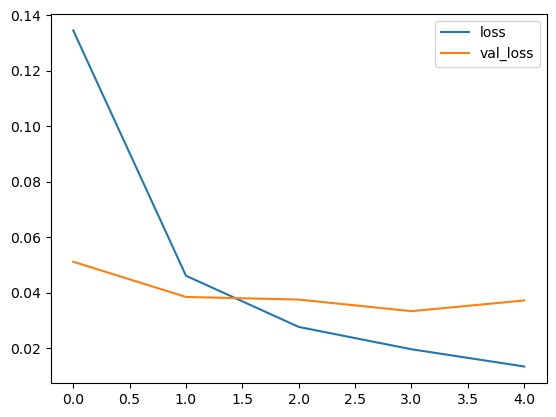

In [30]:
metrics[["loss", "val_loss"]].plot()

<Axes: >

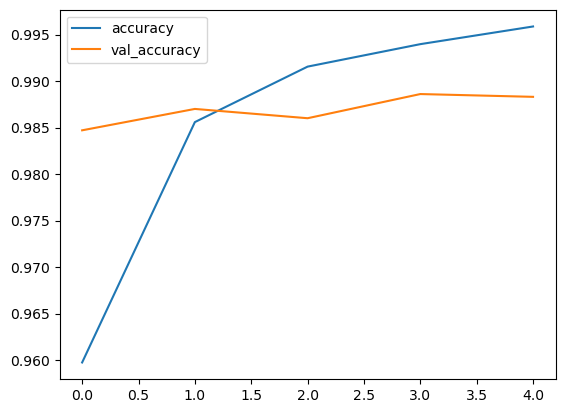

In [31]:
metrics[["accuracy", "val_accuracy"]].plot()

In [32]:
model.evaluate(x_test, y_cat_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0372 - accuracy: 0.9883


[0.03722381219267845, 0.9883000254631042]

In [33]:
from sklearn.metrics import classification_report, confusion_matrix

In [34]:
predictions = np.argmax(model.predict(x_test), axis=1)

313/313 [==============================] - 0s 982us/step


In [35]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.98      0.99      0.99      1010
           4       0.98      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.98      0.99      0.99      1028
           8       0.99      0.98      0.99       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [36]:
confusion_matrix(y_test, predictions)

array([[ 973,    1,    1,    0,    0,    0,    3,    1,    1,    0],
       [   0, 1132,    1,    2,    0,    0,    0,    0,    0,    0],
       [   1,    2, 1017,    2,    0,    0,    2,    7,    1,    0],
       [   0,    0,    1, 1004,    0,    3,    0,    1,    1,    0],
       [   0,    1,    0,    0,  975,    0,    3,    0,    0,    3],
       [   1,    0,    0,   10,    0,  879,    1,    0,    1,    0],
       [   2,    2,    0,    1,    1,    1,  950,    0,    1,    0],
       [   0,    2,    4,    1,    0,    0,    0, 1019,    1,    1],
       [   3,    1,    2,    3,    0,    0,    2,    3,  959,    1],
       [   2,    2,    0,    5,   14,    4,    0,    6,    1,  975]])

In [37]:
import seaborn as sns
from PIL import Image
import tensorflow as tf

<Axes: >

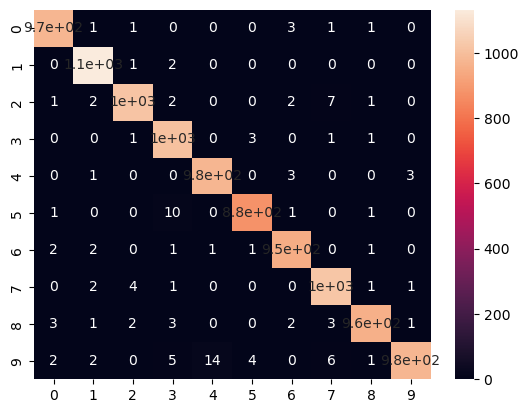

In [38]:
sns.heatmap(confusion_matrix(y_test, predictions), annot=True)

In [39]:
mnist_num = x_test[4]
mnist_num.dtype

dtype('float64')

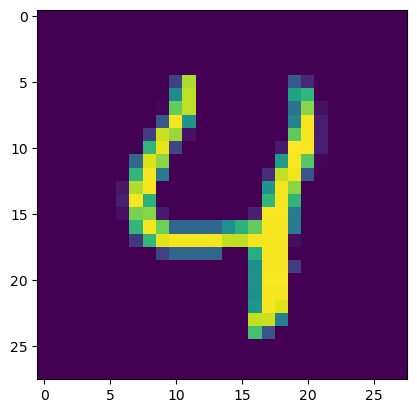

In [40]:
plt.imshow(mnist_num.reshape(28, 28, 1))

In [41]:
np.argmax(model.predict(mnist_num.reshape(1, 28, 28, 1)))

1/1 [==============================] - 0s 11ms/step


4